In [3]:
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import units as u

# https://arxiv.org/pdf/2202.04098.pdf
#https://authors.library.caltech.edu/107338/1/2011.05444.pdf
#https://arxiv.org/pdf/2005.13158.pdf
#https://ui.adsabs.harvard.edu/abs/2018ApJ...864...93M/citations
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
#https://cwitools.readthedocs.io/_/downloads/en/latest/pdf/
#https://cwitools.readthedocs.io/en/v0.8/modules/cwitools.scripts.html#scripts
#from cwitools.scripts import cwi_crop
#from cwitools.scripts.coadd import coadd
#from cwitools.scripts import *
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import AsinhStretch
from reproject.mosaicking import find_optimal_celestial_wcs
from astropy.nddata.utils import Cutout2D
#import montage_wrapper as montage

%matplotlib inline
from astropy.visualization.wcsaxes import Quadrangle

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.axes_size import Fixed, Scaled
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],              # LaTeX default is 10pt font.            # Make the legend/label fonts a little smaller
    "pgf.preamble": r"\usepackage[ut f8x]{inputenc} \usepackage[T1]{fontenc}"   

}
mpl.rcParams.update(pgf_with_latex) 

In [4]:
hdu=fits.open('Feige34_esi_echelle_1_ex_order_2.fits')
hdu.info

hdu[0].header['APNUM1']='1 1 492.22 506.96'

hdu[0].header.set

#hdu[0].header['APNUM2']
#hdu[0].header['APNUM3']
#hdu[0].header['APNUM4']
#hdu[0].header['APNUM5']
#hdu[0].header['APNUM6']
#hdu[0].header['APNUM7']
#hdu[0].header['APNUM8']
#hdu[0].header['APNUM9']
#hdu[0].header['APNUM10']

#del hdu[0].header['APNUM2']
#del hdu[0].header['APNUM3']
#del hdu[0].header['APNUM4']
#del hdu[0].header['APNUM5']
#del hdu[0].header['APNUM6']
#del hdu[0].header['APNUM7']
#del hdu[0].header['APNUM8']
#del hdu[0].header['APNUM9']
#del hdu[0].header['APNUM10']

print(hdu[0].header)

fits.writeto('Feige34_esi_echelle_1_ex_order_2.fits', hdu[0].data, hdu[0].header,overwrite=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Feige34_esi_echelle_1_ex_order_2.fits'

In [ ]:
hdu[0].header['APNUM2']

In [ ]:
hdu_arc=fits.open('ARC_blue_order_2.ms.fits')
hdu_arc.info

In [ ]:
hdu[0].header

In [ ]:
hdu_arc[0].header

In [5]:
The dispersion coordinate systems of the input spectra are set or changed in the output spectra. The output spectra may be the same as the input spectra if no output spectra are specified or the output name is the same as the input name. The input and output spectra are specified by image templates or lists. In the irs/iids packages the input and output spectra are specified as root names and the record numbers are specified by the record parameter. The records are given as a set of comma separate single numbers or ranges of hyphen separated numbers. If no records are specified then the input and output images are assumed to be full names.

The dispersion coordinate system is defined either in the image header or by dispersion functions in the specified database. To use reference spectra dispersion functions they must first be assigned to the image with identify (reidentify), ecidentify (ecreidentify), refspectra, or hedit. These tasks define the image header keywords REFSPEC1, REFSPEC2, REFSHFT1, and REFSHFT2. The test which determines whether to use the current dispersion coordinate system or reference spectra dispersion solutions is the presence of the REFSPEC1 keyword. Since it is an error to apply a dispersion function to data which have already been dispersion corrected the any dispersion function keywords are deleted after use and a record of them entered in sequential image header keywords beginning with DCLOG.

Dispersion functions are specified by one or both of the reference spectrum image header keywords REFSPEC1 and REFSPEC2 containing the name of calibration spectra with dispersion function solutions (either echelle dispersion functions from ecidentify or non-echelle dispersion functions from identify) in the database. There must be a dispersion function for each aperture in the input spectrum unless the ignoreaps flag is set. If the flag is not set the task will abort if a matching aperture is not found while if it is set spectra without a matching aperture in the reference dispersion solutions will use the first dispersion solution. Note that aperture number matching is done in both cases and the ignoreaps parameter only applies to non-matching spectra. The common situation for using the ignoreaps option is when there is a single reference dispersion solution which is to be applied to a number of spectra with different aperture numbers; hence effectively ignoring the reference spectrum aperture number.

If two reference spectra are specified the names may be followed by a weighting factor (assumed to be 1 if missing). The wavelength of a pixel is then the weighted averge of the wavelengths of the two dispersion functions. The task refspectra provides a number of ways to assign reference spectra. Note, however, that these assignments may be made directly using the task hedit or with some other task or script if none of the methods are suitable. Also note that identify and reidentify add the REFSPEC1 keyword refering to the image itself when a database entry is written.

In addition to the one or two reference dispersion functions for each input aperture there may also be image header keywords REFSHFT1 and REFSHFT2 specifying reference spectra whose dispersion function zero point shifts (the "shift" parameter in the database files) are to be applied to the reference dispersion functions. The shifts from REFSHFT1 will be applied to the dispersion functions from REFSPEC1 and similarly for the second dispersion functions. The reference shifts need not be present for every aperture in a multispectrum image. By default the mean shift from all the reference apertures having a zero point shift is applied to all the reference dispersion functions. If the REFSHFT keyword has the modifier word "nearest" following the spectrum name then the shift from the nearest aperture in spatial position (from the aperture extraction limits in the original 2D spectrum as recorded in the 6th and 7th fields of the APNUM keywords) is used for a particular input aperture. If the modifier word is "interp" then the nearest two apertures are used to interpolate a zero point shift spatially.

The purpose of the reference shift keywords is to apply a wavelength zero point correction to the reference dispersion functions determined from separate arc calibration observations using a few apertures taken at the same time as object observations. For example, consider multifiber observations in which one or more fibers are assigned to arc lamps at the same time the other fibers are used to observe various objects. The basic dispersion reference, the REFSPEC keywords, will come from arc observations taken through all the fibers. The arc fibers used during an object observation are then calibrated against their corresponding fibers in the arc calibration observations to determine a zero point shift. The REFSHFT keywords will contain the name of the object spectrum itself and the shifts from the simultaneous arc fibers will be interpolated spatially to the nonarc object fibers and applied to the dispersion functions from the arc calibrations for those fibers.

The reference shift keywords are currently added with hedit and zero point shifts computed with identify/reidentify. The complexities of this have been hidden in the multifiber imred instrument reduction packages. The reference shift correction feature was added primarily for use in those reduction packages.

If the linearize parameter is no the dispersion functions, weights, and shifts are transfered from the database to the world coordinate system keywords in the image header. Except for printing processing information that is all that is done to the spectra.

If the linearize parameter is yes the spectra are interpolated to a linear wavelength scale and the dispersion coordinate system in the header is set apprpriately. A linear wavelength coordinate system is defined by a starting wavelength, an ending wavelength, a wavelength interval per pixel, and the number of pixels. These four parameters actually overspecify the coordinate system and only three of these values are needed to define it. The output coordinate system is specified by giving a set or subset of these parameters using the parameters w1, w2, dw, and nw. When the log option is used these parameters are interpreted as logarithmic; i.e. the starting value is the log of the wavelength of the first pixel and the interval is the interval in the log of the wavelength. Default values for any parameters which are not specified, by using the value INDEF, are supplied based on the wavelengths of the first and last pixel as given by the dispersion function and the number of pixels in the input image. The defaults may either be determined separately for each spectrum (global = no), from all spectra with the same aperture (global = yes and samedisp = no), or from all the spectra (global = yes and samedisp = yes). As indicated, the parameter samedisp determines whether defaults are determined independently for each aperture or set the same for all apertures.

Another way to specify the wavelengths when there are many apertures is to use a wavelength table or reference image. If an spectrum image name is specified with the table parameter then the dispersion parameters for each apertures are set to be the same as the reference spectrum. Alternatively, a text file table consisting of lines containing an aperture number, the starting wavelength, the ending wavelength, the wavelength interval per pixel, and the number of output pixels may be specified. Any of these values may be specified as INDEF (though usually the aperture number is not). One way to view the wavelength table/reference spectrum is that an entry in the wavelength table/reference spectrum overrides the values of the parameters w1, w2, dw, and nw, which normally apply to all apertures, for the specified aperture. The wavelength table is used to specify explicit independent values for apertures. The global mechanism can supply independent values for the INDEF parameters when the samedisp parameter is no.

If one wishes to verify and possibly change the defaults assigned, either globally or individually, the confirm flag may be set. The user is asked whether to accept these values. By responding with no the user is given the chance to change each parameter value. Then the new parameters are printed and the user is again asked to confirm the parameters. This is repeated until the desired parameters are set. When the defaults are not global the changed parameters will not be used for the next spectrum. When the global option is used any changes made are retained (either for all apertures or independently for each aperture) until changed again.

When adjusting the wavelengths the user should specify which parameter is free to change by entering INDEF. If none of the parameters are specified as INDEF then those values which were not changed, i.e. by accepting the current value, are the first to be changed.

Once the wavelength scale has been defined the input spectrum is interpolated for each output pixel. Output wavelengths outside the range of the input spectrum are set to zero. The default interpolation function is a 5th order polynomial. The choice of interpolation type is made with the package parameter "interp". It may be set to "nearest", "linear", "spline3", "poly5", or "sinc". Remember that this applies to all tasks which might need to interpolate spectra in the onedspec and associated packages. For a discussion of interpolation types see onedspec.

When it is desired to conserve total flux, particularly when the dispersion is significantly reduced, the parameter flux is set to yes and the output pixel value is obtained by integrating the interpolation function across the wavelength limits of the output pixel. If it is set to no then the flux density is conserved by averaging across the output pixel limits.

The input spectrum name, reference spectra, and the wavelength parameters will be printed on the standard output if the verbose parameter is set and printed to a log file if one is specified with the logfile parameter. If one wishes to only check what wavelengths will be determined for the defaults without actually dispersion correcting the spectra the listonly flag may be set.

Other tasks which may be used to change the dispersion coordinate system are scopy, specshift, and sapertures.

SyntaxError: invalid syntax (1386584006.py, line 1)

In [6]:
hdu=fits.open('dFeige34_esi_echelle_1_ex_order_2.fits')
hdu.info


FileNotFoundError: [Errno 2] No such file or directory: 'dFeige34_esi_echelle_1_ex_order_2.fits'

In [7]:
hdu[0].header

NameError: name 'hdu' is not defined

In [8]:
hdu=fits.open('dFeige34_esi_echelle_1_ex_order_10.fits')
hdu.info


FileNotFoundError: [Errno 2] No such file or directory: 'dFeige34_esi_echelle_1_ex_order_10.fits'

In [9]:
hdu[0].header

NameError: name 'hdu' is not defined

In [10]:

fitsfile=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/Reductions/ToO_Shane_24th_Jan_2023/pre_reduced/2023aez/2023aez_ex/d2023aez_kast_red_1_ex.fits')
rawdata=fitsfile[0].data
head=fitsfile[0].header
print(rawdata.shape)
np.zeros((rawdata.shape[2],rawdata.shape[1]))

(4, 1, 2661)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [11]:

fitsfile=fits.open('Feige34_ex/dFeige34_esi_echelle_1_ex_order_1.fits')
rawdata=fitsfile[0].data
head=fitsfile[0].header
print(rawdata.shape)



FileNotFoundError: [Errno 2] No such file or directory: 'Feige34_ex/dFeige34_esi_echelle_1_ex_order_1.fits'

In [12]:

fitsfile=fits.open('Feige34_ex/dFeige34_esi_echelle_1_ex_order_2.fits')
rawdata=fitsfile[0].data
head=fitsfile[0].header
print(rawdata.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'Feige34_ex/dFeige34_esi_echelle_1_ex_order_2.fits'

In [13]:

fitsfile=fits.open('Feige34_ex/dFeige34_esi_echelle_1_ex_order_3.fits')
rawdata=fitsfile[0].data
head=fitsfile[0].header
print(rawdata.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'Feige34_ex/dFeige34_esi_echelle_1_ex_order_3.fits'

In [14]:

fitsfile=fits.open('Feige34_ex/dFeige34_esi_echelle_1_ex_order_4.fits')
rawdata=fitsfile[0].data
head=fitsfile[0].header
print(rawdata.shape)
head

FileNotFoundError: [Errno 2] No such file or directory: 'Feige34_ex/dFeige34_esi_echelle_1_ex_order_4.fits'

In [15]:
np.zeros((rawdata.shape[1],1))

array([[0.]])

(4, 1, 1771)
[-1.3671447e+00  6.8050685e+00 -8.8499308e-01 ...  1.3790115e+03
  1.3617290e+03  1.5164766e+03]
[  -3.7371123   -5.861554     6.814117  ... 1363.8254    1349.3511
 1533.3093   ]
[ 17.562836   19.102364    6.4714317 ... 220.01686   213.54195
 228.09789  ]
[ 3.4636784  4.394197   3.5282555 ... 37.644363  37.61841   40.935112 ]


(4, 1, 1771)

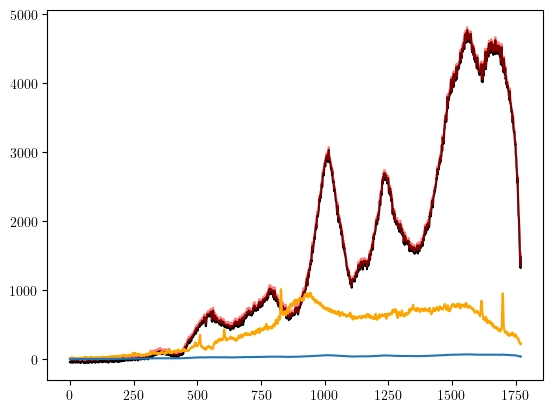

In [16]:
fitsfile=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/Reductions/kirsty_reductions_21_dec/pre_reduced/2022zut/2022zut_ex/d2022zut_kast_blue_1_ex.fits')
rawdata=fitsfile[0].data
#head=fitsfile[1].header

print(np.shape(rawdata))

print(rawdata[0,0,:])
print(rawdata[1,0,:])
print(rawdata[2,0,:])
print(rawdata[3,0,:])


fig,ax=plt.subplots(1,1)

ax.plot(rawdata[0,0,:]-40,color='black')
ax.plot(rawdata[1,0,:],color='red',alpha=0.5)
ax.plot(rawdata[2,0,:],color='orange')
ax.plot(rawdata[3,0,:])

fitsfile.info



np.shape(rawdata[:,:,:])

In [17]:
fitsfile.info()

Filename: /Users/kirstytaggart/UCSC_spectral_pipeline/test_data/Reductions/kirsty_reductions_21_dec/pre_reduced/2022zut/2022zut_ex/d2022zut_kast_blue_1_ex.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     251   (1771, 1, 4)   float32   


In [18]:
def getmswave(head,aperture):
    import numpy as np
    # have to add 1 as IRAF is not 0 indexed
    specstr='spec'+str(aperture+1)
    watflag=False
    for i,hcard in enumerate(head.cards):
        #print(i,hcard[1])

        if ('WAT2' in hcard[0]):
            if (specstr in hcard[1]):
                #print('here in the pipeline')
                #print(i,hcard)
                watstring=hcard[1]
                specloc=watstring.find(specstr)
                watstringsub=watstring[specloc:]
                quoteloc=watstringsub.find('"')
                specsub=watstringsub[quoteloc+1:]
                specsubsplit=specsub.split()
                crval=float(specsubsplit[3])
                cdelt=float(specsubsplit[4])
                npix=float(specsubsplit[5])
                watflag=True
    if (not watflag):
        crval=float(head['CRVAL1'])
        cdelt=float(head['CD1_1'])
        npix=float(head['NAXIS1'])
        wave=np.arange(npix)*cdelt + crval
    return wave



(3, 2976)
[ 476.21744  485.6904   457.85858 ... 5409.546   5090.239   5318.7974 ]
[ 476.75272  491.84695  474.62506 ... 5402.7544  5077.1797  5315.1763 ]
[21.034748 21.927315 22.234766 ... 73.32346  70.661575 72.37607 ]
(2976,)
(3, 2976)
[ 467.88876  472.51315  453.59702 ... 5536.0645  5313.546   5377.33   ]
[ 468.583    479.06537  468.0634  ... 5529.5264  5301.2915  5372.6807 ]
[20.666758 21.43651  21.724785 ... 75.33612  73.41892  73.34068 ]
(2976,)


[]

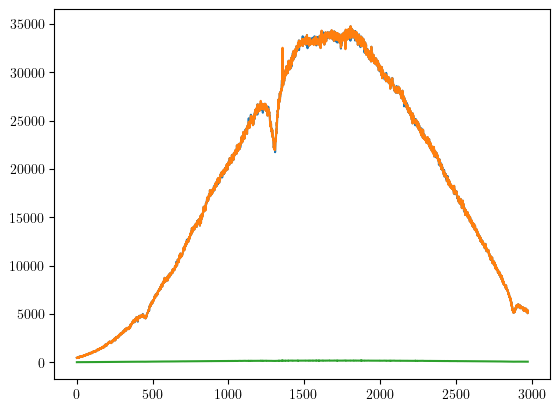

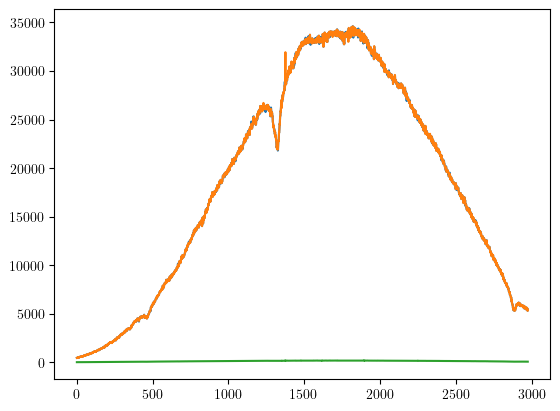

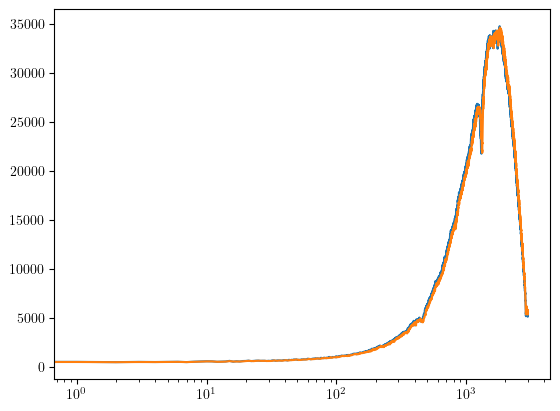

In [19]:


fitsfile=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-02-15/data/pre_reduced/Feige34/Feige34_ex/dFeige34_esi_echelle_1_ex_order_1_log_scaling.fits')
rawdata=fitsfile[0].data
head_log=fitsfile[0].header
print(rawdata.shape)
print(rawdata[0,:])
print(rawdata[1,:])
print(rawdata[2,:])
print(np.shape(rawdata[2,:]))


fig,ax=plt.subplots(1,1)
ax.plot(rawdata[0,:])
ax.plot(rawdata[1,:])
ax.plot(rawdata[2,:])


fitsfile=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-02-15/data/pre_reduced/Feige34/Feige34_ex/dFeige34_esi_echelle_1_ex_order_1_linear_scaling.fits')
rawdata2=fitsfile[0].data
head_linear=fitsfile[0].header
print(rawdata2.shape)
print(rawdata2[0,:])
print(rawdata2[1,:])
print(rawdata2[2,:])
print(np.shape(rawdata2[2,:]))

fig,ax=plt.subplots(1,1)
ax.plot(rawdata2[0,:])
ax.plot(rawdata2[1,:])
ax.plot(rawdata2[2,:])
#ax.set_ylim(ymax=100,ymin=-50)



fig,ax=plt.subplots(1,1)
ax.plot(rawdata[0,:])
ax.plot(rawdata2[0,:])
ax.semilogx()


In [20]:
getmswave(head_linear,1)

array([3887.1528237 , 3887.30613568, 3887.45944766, ..., 4342.94934223,
       4343.10265421, 4343.25596619])

In [21]:
getmswave(head_log,1)

IndexError: list index out of range

In [ ]:
fitsfile=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-02-15/data/pre_reduced/Feige34/Feige34_esi_echelle_1_ex_order_1.fits')
fitsfile.info()

In [ ]:
head_log

In [22]:
BANDID1 = 'spectrum - background fit, weights variance, clean yes'              
BANDID2 = 'raw - background fit, weights none, clean no'                        
BANDID3 = 'background - background fit'                                         
BANDID4 = 'sigma - background fit, weights variance, clean yes'   

BANDID1 = 'spectrum - background none, weights variance, clean yes'             
BANDID2 = 'raw - background none, weights none, clean no'                       
BANDID3 = 'sigma - background none, weights variance, clean yes'   

In [23]:
fitsfile=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-02-15/data/pre_reduced/Feige34/Feige34_esi_echelle_1_ex.fits')
fitsfile.info()



Filename: /Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-02-15/data/pre_reduced/Feige34/Feige34_esi_echelle_1_ex.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     323   (4096, 10, 3)   float32   


In [24]:
fitsfile=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-02-15/data/pre_reduced/Feige67/Feige67_ex/dFeige67_esi_echelle_1_ex_order_1.fits')
fitsfile.info()

Filename: /Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-02-15/data/pre_reduced/Feige67/Feige67_ex/dFeige67_esi_echelle_1_ex_order_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     323   (2976, 4)   float32   


In [25]:
fitsfile[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2976 / Axis length                                    
NAXIS2  =                    4 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2023-03-23T21:51:00' / Date FITS file was generated                  
IRAF-TLM= '2023-03-23T21:51:00' / Time of last modification                     
OBJECT  = 'Feige67 '           / Name of the object observed                    
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA S

In [26]:
getmswave(fitsfile[0].header,1)

array([3861.87902149, 3862.04459817, 3862.21017485, ..., 4354.13849749,
       4354.30407417, 4354.46965085])

In [27]:
#image = image[..., np.newaxis]
np.shape(fitsfile[0].data)

(4, 2976)

In [28]:
image=fitsfile[0].data
print(np.shape(image))
print(np.shape(image[:,np.newaxis,:]))

(4, 2976)
(4, 1, 2976)


In [70]:
aperture=1
standard_fitsfile_1=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/G191B2B/G191B2B_ex/dG191B2B_esi_echelle_1_ex_order_1.fits')
standard_fitsfile_2=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/G191B2B/G191B2B_ex/dG191B2B_esi_echelle_1_ex_order_2.fits')
standard_fitsfile_3=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/G191B2B/G191B2B_ex/dG191B2B_esi_echelle_1_ex_order_3.fits')
standard_fitsfile_4=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/G191B2B/G191B2B_ex/dG191B2B_esi_echelle_1_ex_order_4.fits')
standard_fitsfile_5=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/G191B2B/G191B2B_ex/dG191B2B_esi_echelle_1_ex_order_5.fits')
standard_fitsfile_6=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/G191B2B/G191B2B_ex/dG191B2B_esi_echelle_1_ex_order_6.fits')
standard_fitsfile_7=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/G191B2B/G191B2B_ex/dG191B2B_esi_echelle_1_ex_order_7.fits')
standard_fitsfile_8=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/G191B2B/G191B2B_ex/dG191B2B_esi_echelle_1_ex_order_8.fits')
standard_fitsfile_9=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/G191B2B/G191B2B_ex/dG191B2B_esi_echelle_1_ex_order_9.fits')
standard_fitsfile_10=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/G191B2B/G191B2B_ex/dG191B2B_esi_echelle_1_ex_order_10.fits')

wave1=getmswave(fitsfile_1[0].header,aperture)
wave2=getmswave(fitsfile_2[0].header,aperture)
wave3=getmswave(fitsfile_3[0].header,aperture)
wave4=getmswave(fitsfile_4[0].header,aperture)
wave5=getmswave(fitsfile_5[0].header,aperture)
wave6=getmswave(fitsfile_6[0].header,aperture)
wave7=getmswave(fitsfile_7[0].header,aperture)
wave8=getmswave(fitsfile_8[0].header,aperture)
wave9=getmswave(fitsfile_9[0].header,aperture)
wave10=getmswave(fitsfile_10[0].header,aperture)



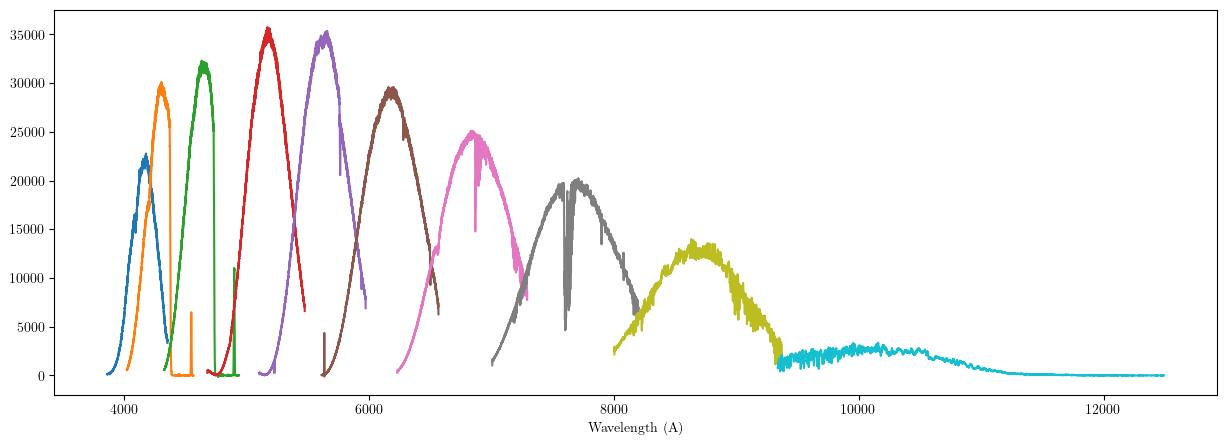

In [71]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1 ,standard_fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2 ,standard_fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3 ,standard_fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4 ,standard_fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5 ,standard_fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6 ,standard_fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7 ,standard_fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8 ,standard_fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9 ,standard_fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,standard_fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
plt.savefig('G191B2B.png')



In [52]:
aperture=1
fitsfile_1 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bee/2023bee_ex/d2023bee_esi_echelle_1_ex_order_1.fits')
fitsfile_2 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bee/2023bee_ex/d2023bee_esi_echelle_1_ex_order_2.fits')
fitsfile_3 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bee/2023bee_ex/d2023bee_esi_echelle_1_ex_order_3.fits')
fitsfile_4 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bee/2023bee_ex/d2023bee_esi_echelle_1_ex_order_4.fits')
fitsfile_5 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bee/2023bee_ex/d2023bee_esi_echelle_1_ex_order_5.fits')
fitsfile_6 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bee/2023bee_ex/d2023bee_esi_echelle_1_ex_order_6.fits')
fitsfile_7 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bee/2023bee_ex/d2023bee_esi_echelle_1_ex_order_7.fits')
fitsfile_8 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bee/2023bee_ex/d2023bee_esi_echelle_1_ex_order_8.fits')
fitsfile_9 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bee/2023bee_ex/d2023bee_esi_echelle_1_ex_order_9.fits')
fitsfile_10=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bee/2023bee_ex/d2023bee_esi_echelle_1_ex_order_10.fits')

wave1=getmswave(fitsfile_1[0].header,aperture)
wave2=getmswave(fitsfile_2[0].header,aperture)
wave3=getmswave(fitsfile_3[0].header,aperture)
wave4=getmswave(fitsfile_4[0].header,aperture)
wave5=getmswave(fitsfile_5[0].header,aperture)
wave6=getmswave(fitsfile_6[0].header,aperture)
wave7=getmswave(fitsfile_7[0].header,aperture)
wave8=getmswave(fitsfile_8[0].header,aperture)
wave9=getmswave(fitsfile_9[0].header,aperture)
wave10=getmswave(fitsfile_10[0].header,aperture)



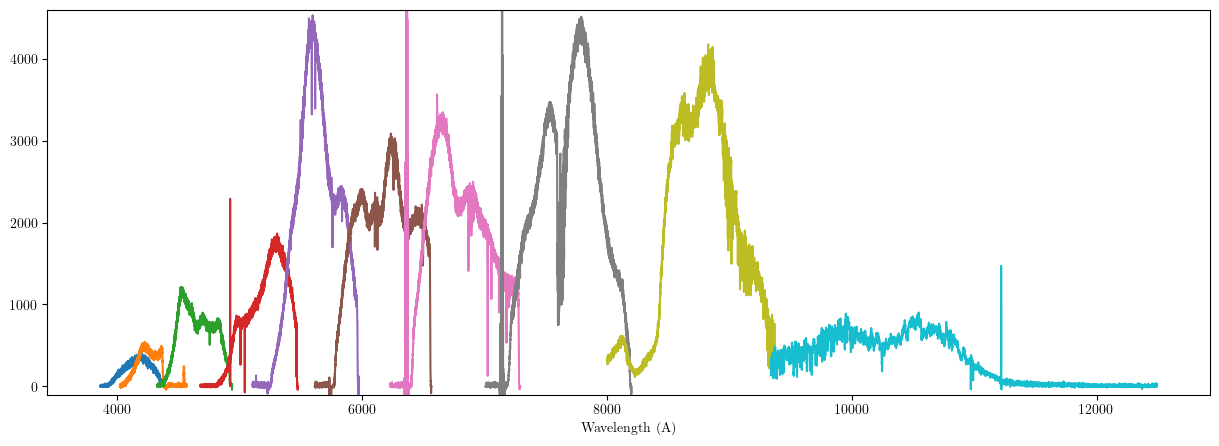

In [59]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1,fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2,fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3,fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4,fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5,fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6,fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7,fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8,fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9,fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-100,ymax=4600)
plt.savefig('2023bee.png')

In [60]:
aperture=1
fitsfile_1 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bvh/2023bvh_ex/d2023bvh_esi_echelle_1_ex_order_1.fits')
fitsfile_2 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bvh/2023bvh_ex/d2023bvh_esi_echelle_1_ex_order_2.fits')
fitsfile_3 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bvh/2023bvh_ex/d2023bvh_esi_echelle_1_ex_order_3.fits')
fitsfile_4 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bvh/2023bvh_ex/d2023bvh_esi_echelle_1_ex_order_4.fits')
fitsfile_5 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bvh/2023bvh_ex/d2023bvh_esi_echelle_1_ex_order_5.fits')
fitsfile_6 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bvh/2023bvh_ex/d2023bvh_esi_echelle_1_ex_order_6.fits')
fitsfile_7 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bvh/2023bvh_ex/d2023bvh_esi_echelle_1_ex_order_7.fits')
fitsfile_8 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bvh/2023bvh_ex/d2023bvh_esi_echelle_1_ex_order_8.fits')
fitsfile_9 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bvh/2023bvh_ex/d2023bvh_esi_echelle_1_ex_order_9.fits')
fitsfile_10=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023bvh/2023bvh_ex/d2023bvh_esi_echelle_1_ex_order_10.fits')

wave1=getmswave(fitsfile_1[0].header,aperture)
wave2=getmswave(fitsfile_2[0].header,aperture)
wave3=getmswave(fitsfile_3[0].header,aperture)
wave4=getmswave(fitsfile_4[0].header,aperture)
wave5=getmswave(fitsfile_5[0].header,aperture)
wave6=getmswave(fitsfile_6[0].header,aperture)
wave7=getmswave(fitsfile_7[0].header,aperture)
wave8=getmswave(fitsfile_8[0].header,aperture)
wave9=getmswave(fitsfile_9[0].header,aperture)
wave10=getmswave(fitsfile_10[0].header,aperture)

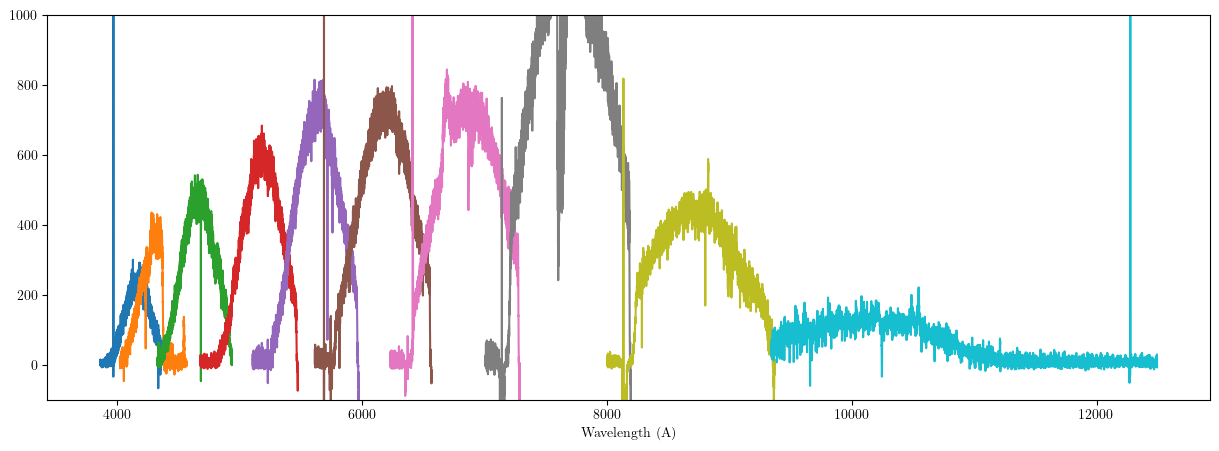

In [65]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1,fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2,fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3,fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4,fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5,fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6,fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7,fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8,fitsfile_8[0].data[0,:]/10,label='order 8')
ax.plot(wave9,fitsfile_9[0].data[0,:]/10,label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-100,ymax=1000)
plt.savefig('2023bvh.png')

In [66]:
aperture=1
fitsfile_1 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023dtc/2023dtc_ex/d2023dtc_esi_echelle_1_ex_order_1.fits')
fitsfile_2 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023dtc/2023dtc_ex/d2023dtc_esi_echelle_1_ex_order_2.fits')
fitsfile_3 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023dtc/2023dtc_ex/d2023dtc_esi_echelle_1_ex_order_3.fits')
fitsfile_4 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023dtc/2023dtc_ex/d2023dtc_esi_echelle_1_ex_order_4.fits')
fitsfile_5 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023dtc/2023dtc_ex/d2023dtc_esi_echelle_1_ex_order_5.fits')
fitsfile_6 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023dtc/2023dtc_ex/d2023dtc_esi_echelle_1_ex_order_6.fits')
fitsfile_7 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023dtc/2023dtc_ex/d2023dtc_esi_echelle_1_ex_order_7.fits')
fitsfile_8 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023dtc/2023dtc_ex/d2023dtc_esi_echelle_1_ex_order_8.fits')
fitsfile_9 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023dtc/2023dtc_ex/d2023dtc_esi_echelle_1_ex_order_9.fits')
fitsfile_10=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023dtc/2023dtc_ex/d2023dtc_esi_echelle_1_ex_order_10.fits')

wave1=getmswave(fitsfile_1[0].header,aperture)
wave2=getmswave(fitsfile_2[0].header,aperture)
wave3=getmswave(fitsfile_3[0].header,aperture)
wave4=getmswave(fitsfile_4[0].header,aperture)
wave5=getmswave(fitsfile_5[0].header,aperture)
wave6=getmswave(fitsfile_6[0].header,aperture)
wave7=getmswave(fitsfile_7[0].header,aperture)
wave8=getmswave(fitsfile_8[0].header,aperture)
wave9=getmswave(fitsfile_9[0].header,aperture)
wave10=getmswave(fitsfile_10[0].header,aperture)

/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/1465361515.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/1465361515.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')


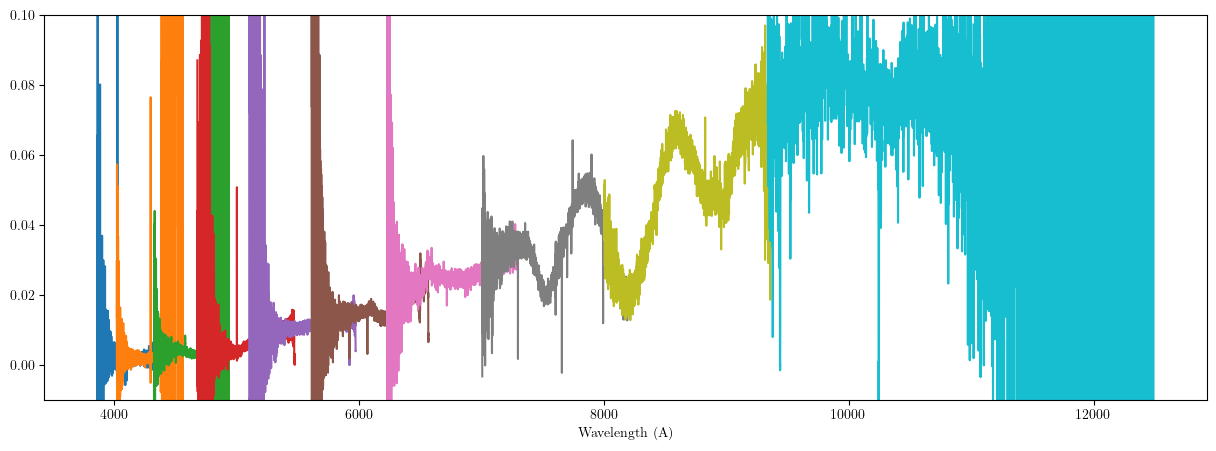

In [82]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1 , fitsfile_1[0].data[0,:]/standard_fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4 , fitsfile_4[0].data[0,:]/standard_fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5 , fitsfile_5[0].data[0,:]/standard_fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6 , fitsfile_6[0].data[0,:]/standard_fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7 , fitsfile_7[0].data[0,:]/standard_fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8 , fitsfile_8[0].data[0,:]/standard_fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9 , fitsfile_9[0].data[0,:]/standard_fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:]/standard_fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-0.01,ymax=0.1)
plt.savefig('2023dtc.png')

In [83]:
aperture=1
fitsfile_1 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xkq/2022xkq_ex/d2022xkq_esi_echelle_1_ex_order_1.fits')
fitsfile_2 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xkq/2022xkq_ex/d2022xkq_esi_echelle_1_ex_order_2.fits')
fitsfile_3 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xkq/2022xkq_ex/d2022xkq_esi_echelle_1_ex_order_3.fits')
fitsfile_4 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xkq/2022xkq_ex/d2022xkq_esi_echelle_1_ex_order_4.fits')
fitsfile_5 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xkq/2022xkq_ex/d2022xkq_esi_echelle_1_ex_order_5.fits')
fitsfile_6 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xkq/2022xkq_ex/d2022xkq_esi_echelle_1_ex_order_6.fits')
fitsfile_7 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xkq/2022xkq_ex/d2022xkq_esi_echelle_1_ex_order_7.fits')
fitsfile_8 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xkq/2022xkq_ex/d2022xkq_esi_echelle_1_ex_order_8.fits')
fitsfile_9 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xkq/2022xkq_ex/d2022xkq_esi_echelle_1_ex_order_9.fits')
fitsfile_10=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xkq/2022xkq_ex/d2022xkq_esi_echelle_1_ex_order_10.fits')

wave1=getmswave(fitsfile_1[0].header,aperture)
wave2=getmswave(fitsfile_2[0].header,aperture)
wave3=getmswave(fitsfile_3[0].header,aperture)
wave4=getmswave(fitsfile_4[0].header,aperture)
wave5=getmswave(fitsfile_5[0].header,aperture)
wave6=getmswave(fitsfile_6[0].header,aperture)
wave7=getmswave(fitsfile_7[0].header,aperture)
wave8=getmswave(fitsfile_8[0].header,aperture)
wave9=getmswave(fitsfile_9[0].header,aperture)
wave10=getmswave(fitsfile_10[0].header,aperture)

/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/864591203.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/864591203.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')


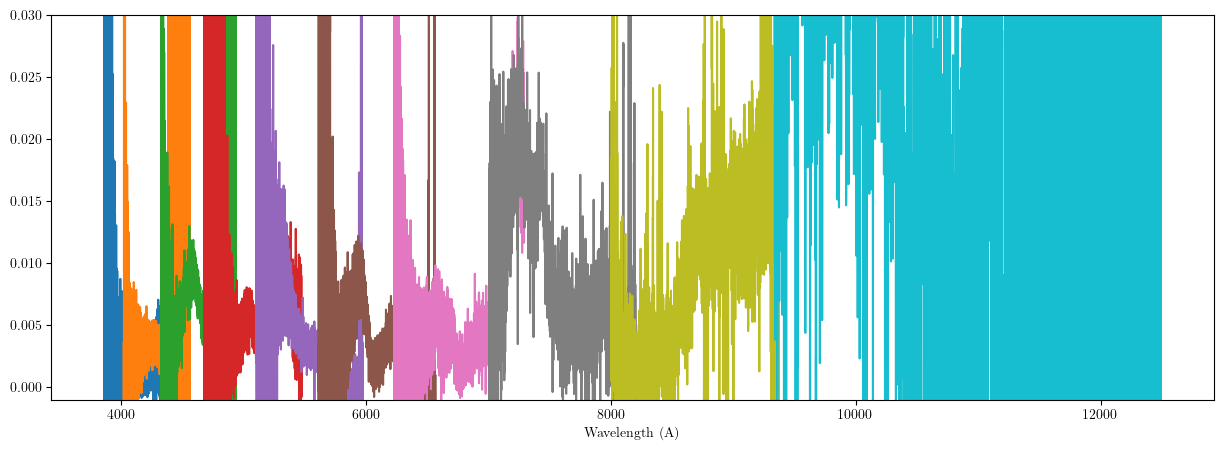

In [97]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1 , fitsfile_1[0].data[0,:]/standard_fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4 , fitsfile_4[0].data[0,:]/standard_fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5 , fitsfile_5[0].data[0,:]/standard_fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6 , fitsfile_6[0].data[0,:]/standard_fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7 , fitsfile_7[0].data[0,:]/standard_fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8 , fitsfile_8[0].data[0,:]/standard_fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9 , fitsfile_9[0].data[0,:]/standard_fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:]/standard_fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-0.001,ymax=0.03)

#ax.set_ylim(ymin=0.001,ymax=0.5)
#ax.semilogy()
plt.savefig('2022xkq.png')

In [108]:
aperture=1
fitsfile_1 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023clx/2023clx_ex/d2023clx_esi_echelle_1_ex_order_1.fits')
fitsfile_2 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023clx/2023clx_ex/d2023clx_esi_echelle_1_ex_order_2.fits')
fitsfile_3 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023clx/2023clx_ex/d2023clx_esi_echelle_1_ex_order_3.fits')
fitsfile_4 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023clx/2023clx_ex/d2023clx_esi_echelle_1_ex_order_4.fits')
fitsfile_5 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023clx/2023clx_ex/d2023clx_esi_echelle_1_ex_order_5.fits')
fitsfile_6 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023clx/2023clx_ex/d2023clx_esi_echelle_1_ex_order_6.fits')
fitsfile_7 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023clx/2023clx_ex/d2023clx_esi_echelle_1_ex_order_7.fits')
fitsfile_8 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023clx/2023clx_ex/d2023clx_esi_echelle_1_ex_order_8.fits')
fitsfile_9 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023clx/2023clx_ex/d2023clx_esi_echelle_1_ex_order_9.fits')
fitsfile_10=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2023clx/2023clx_ex/d2023clx_esi_echelle_1_ex_order_10.fits')

wave1=getmswave(fitsfile_1[0].header,aperture)
wave2=getmswave(fitsfile_2[0].header,aperture)
wave3=getmswave(fitsfile_3[0].header,aperture)
wave4=getmswave(fitsfile_4[0].header,aperture)
wave5=getmswave(fitsfile_5[0].header,aperture)
wave6=getmswave(fitsfile_6[0].header,aperture)
wave7=getmswave(fitsfile_7[0].header,aperture)
wave8=getmswave(fitsfile_8[0].header,aperture)
wave9=getmswave(fitsfile_9[0].header,aperture)
wave10=getmswave(fitsfile_10[0].header,aperture)

/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/3786793890.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/3786793890.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/3786793890.py:22: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/3786793890.py:23: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')


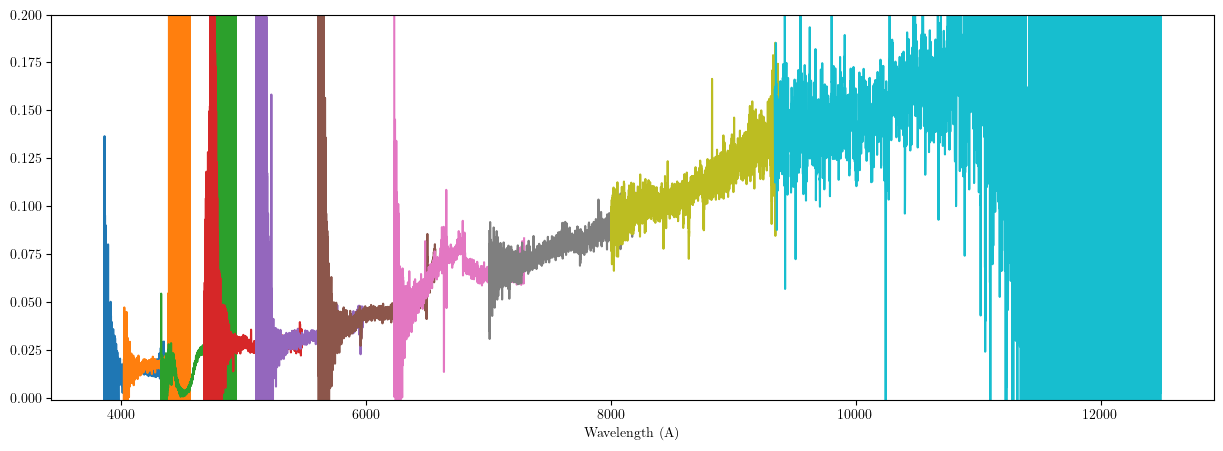

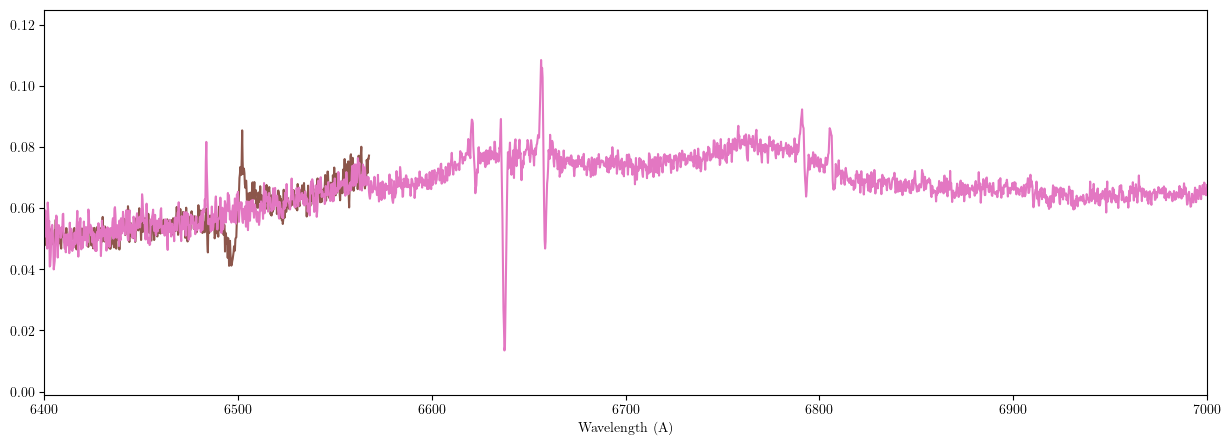

In [112]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1 , fitsfile_1[0].data[0,:]/standard_fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4 , fitsfile_4[0].data[0,:]/standard_fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5 , fitsfile_5[0].data[0,:]/standard_fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6 , fitsfile_6[0].data[0,:]/standard_fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7 , fitsfile_7[0].data[0,:]/standard_fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8 , fitsfile_8[0].data[0,:]/standard_fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9 , fitsfile_9[0].data[0,:]/standard_fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:]/standard_fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-0.001,ymax=0.2)

#ax.set_ylim(ymin=0.001,ymax=0.5)
#ax.semilogy()
plt.savefig('2023clx.png')


fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1 , fitsfile_1[0].data[0,:]/standard_fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4 , fitsfile_4[0].data[0,:]/standard_fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5 , fitsfile_5[0].data[0,:]/standard_fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6 , fitsfile_6[0].data[0,:]/standard_fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7 , fitsfile_7[0].data[0,:]/standard_fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8 , fitsfile_8[0].data[0,:]/standard_fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9 , fitsfile_9[0].data[0,:]/standard_fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:]/standard_fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-0.001,ymax=0.125)
ax.set_xlim(xmin=6400,xmax=7000)

#ax.set_ylim(ymin=0.001,ymax=0.5)
#ax.semilogy()
plt.savefig('2023clx_zoom.png')

In [104]:
aperture=1
fitsfile_1 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022zut/2022zut_ex/d2022zut_esi_echelle_1_ex_order_1.fits')
fitsfile_2 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022zut/2022zut_ex/d2022zut_esi_echelle_1_ex_order_2.fits')
fitsfile_3 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022zut/2022zut_ex/d2022zut_esi_echelle_1_ex_order_3.fits')
fitsfile_4 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022zut/2022zut_ex/d2022zut_esi_echelle_1_ex_order_4.fits')
fitsfile_5 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022zut/2022zut_ex/d2022zut_esi_echelle_1_ex_order_5.fits')
fitsfile_6 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022zut/2022zut_ex/d2022zut_esi_echelle_1_ex_order_6.fits')
fitsfile_7 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022zut/2022zut_ex/d2022zut_esi_echelle_1_ex_order_7.fits')
fitsfile_8 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022zut/2022zut_ex/d2022zut_esi_echelle_1_ex_order_8.fits')
fitsfile_9 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022zut/2022zut_ex/d2022zut_esi_echelle_1_ex_order_9.fits')
fitsfile_10=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022zut/2022zut_ex/d2022zut_esi_echelle_1_ex_order_10.fits')

wave1=getmswave(fitsfile_1[0].header,aperture)
wave2=getmswave(fitsfile_2[0].header,aperture)
wave3=getmswave(fitsfile_3[0].header,aperture)
wave4=getmswave(fitsfile_4[0].header,aperture)
wave5=getmswave(fitsfile_5[0].header,aperture)
wave6=getmswave(fitsfile_6[0].header,aperture)
wave7=getmswave(fitsfile_7[0].header,aperture)
wave8=getmswave(fitsfile_8[0].header,aperture)
wave9=getmswave(fitsfile_9[0].header,aperture)
wave10=getmswave(fitsfile_10[0].header,aperture)

/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/1511991158.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/1511991158.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')


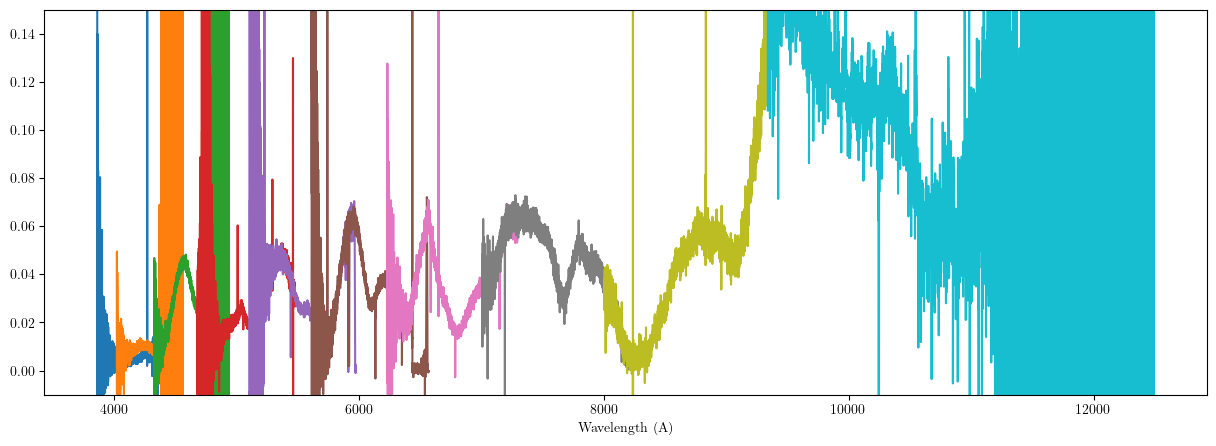

In [107]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1 , fitsfile_1[0].data[0,:]/standard_fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4 , fitsfile_4[0].data[0,:]/standard_fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5 , fitsfile_5[0].data[0,:]/standard_fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6 , fitsfile_6[0].data[0,:]/standard_fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7 , fitsfile_7[0].data[0,:]/standard_fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8 , fitsfile_8[0].data[0,:]/standard_fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9 , fitsfile_9[0].data[0,:]/standard_fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:]/standard_fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-0.01,ymax=0.15)

#ax.set_ylim(ymin=0.001,ymax=0.5)
#ax.semilogy()
plt.savefig('2022zut.png')

In [114]:
aperture=1
fitsfile_1 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xxf/2022xxf_ex/d2022xxf_esi_echelle_1_ex_order_1.fits')
fitsfile_2 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xxf/2022xxf_ex/d2022xxf_esi_echelle_1_ex_order_2.fits')
fitsfile_3 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xxf/2022xxf_ex/d2022xxf_esi_echelle_1_ex_order_3.fits')
fitsfile_4 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xxf/2022xxf_ex/d2022xxf_esi_echelle_1_ex_order_4.fits')
fitsfile_5 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xxf/2022xxf_ex/d2022xxf_esi_echelle_1_ex_order_5.fits')
fitsfile_6 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xxf/2022xxf_ex/d2022xxf_esi_echelle_1_ex_order_6.fits')
fitsfile_7 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xxf/2022xxf_ex/d2022xxf_esi_echelle_1_ex_order_7.fits')
fitsfile_8 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xxf/2022xxf_ex/d2022xxf_esi_echelle_1_ex_order_8.fits')
fitsfile_9 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xxf/2022xxf_ex/d2022xxf_esi_echelle_1_ex_order_9.fits')
fitsfile_10=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022xxf/2022xxf_ex/d2022xxf_esi_echelle_1_ex_order_10.fits')

wave1=getmswave(fitsfile_1[0].header,aperture)
wave2=getmswave(fitsfile_2[0].header,aperture)
wave3=getmswave(fitsfile_3[0].header,aperture)
wave4=getmswave(fitsfile_4[0].header,aperture)
wave5=getmswave(fitsfile_5[0].header,aperture)
wave6=getmswave(fitsfile_6[0].header,aperture)
wave7=getmswave(fitsfile_7[0].header,aperture)
wave8=getmswave(fitsfile_8[0].header,aperture)
wave9=getmswave(fitsfile_9[0].header,aperture)
wave10=getmswave(fitsfile_10[0].header,aperture)

/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/3651185679.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/3651185679.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')


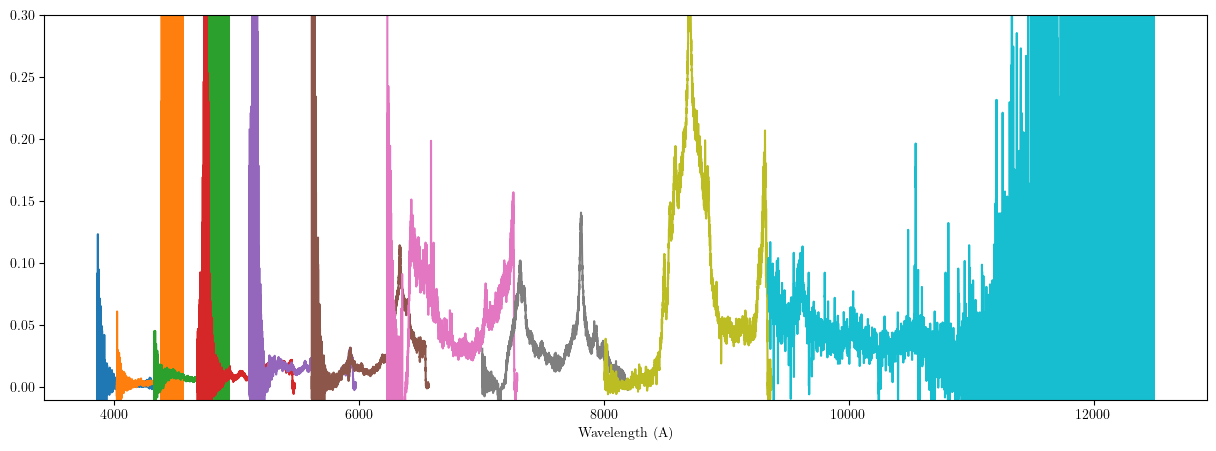

In [119]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1 , fitsfile_1[0].data[0,:]/standard_fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4 , fitsfile_4[0].data[0,:]/standard_fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5 , fitsfile_5[0].data[0,:]/standard_fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6 , fitsfile_6[0].data[0,:]/standard_fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7 , fitsfile_7[0].data[0,:]/standard_fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8 , fitsfile_8[0].data[0,:]/standard_fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9 , fitsfile_9[0].data[0,:]/standard_fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:]/standard_fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-0.01,ymax=0.3)

#ax.set_ylim(ymin=0.001,ymax=0.5)
#ax.semilogy()
plt.savefig('2022xxf.png')

In [121]:
aperture=1
fitsfile_1 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022dok/2022dok_ex/d2022dok_esi_echelle_1_ex_order_1.fits')
fitsfile_2 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022dok/2022dok_ex/d2022dok_esi_echelle_1_ex_order_2.fits')
fitsfile_3 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022dok/2022dok_ex/d2022dok_esi_echelle_1_ex_order_3.fits')
fitsfile_4 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022dok/2022dok_ex/d2022dok_esi_echelle_1_ex_order_4.fits')
fitsfile_5 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022dok/2022dok_ex/d2022dok_esi_echelle_1_ex_order_5.fits')
fitsfile_6 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022dok/2022dok_ex/d2022dok_esi_echelle_1_ex_order_6.fits')
fitsfile_7 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022dok/2022dok_ex/d2022dok_esi_echelle_1_ex_order_7.fits')
fitsfile_8 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022dok/2022dok_ex/d2022dok_esi_echelle_1_ex_order_8.fits')
fitsfile_9 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022dok/2022dok_ex/d2022dok_esi_echelle_1_ex_order_9.fits')
fitsfile_10=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022dok/2022dok_ex/d2022dok_esi_echelle_1_ex_order_10.fits')

wave1=getmswave(fitsfile_1[0].header,aperture)
wave2=getmswave(fitsfile_2[0].header,aperture)
wave3=getmswave(fitsfile_3[0].header,aperture)
wave4=getmswave(fitsfile_4[0].header,aperture)
wave5=getmswave(fitsfile_5[0].header,aperture)
wave6=getmswave(fitsfile_6[0].header,aperture)
wave7=getmswave(fitsfile_7[0].header,aperture)
wave8=getmswave(fitsfile_8[0].header,aperture)
wave9=getmswave(fitsfile_9[0].header,aperture)
wave10=getmswave(fitsfile_10[0].header,aperture)

/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/728778637.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/728778637.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/728778637.py:22: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/728778637.py:23: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')


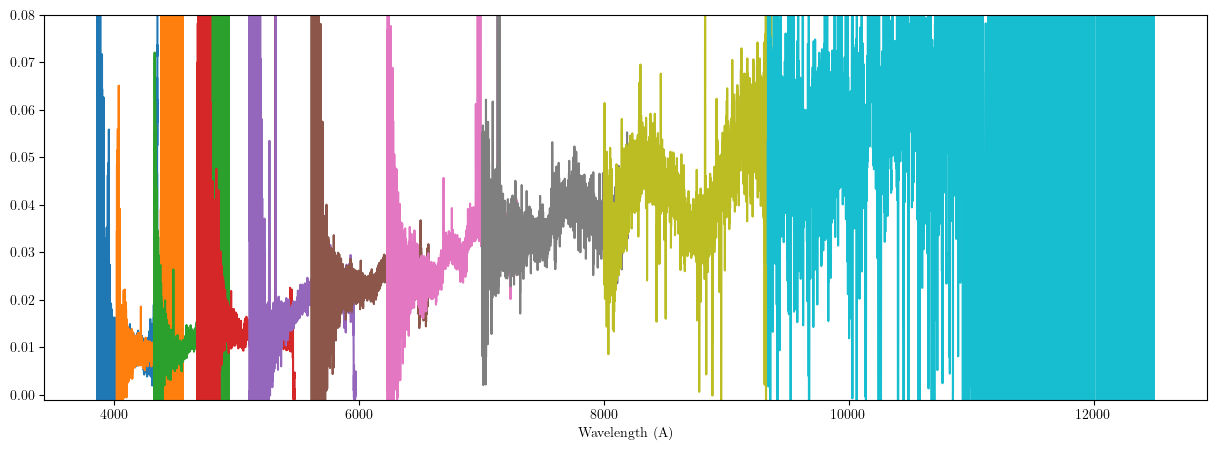

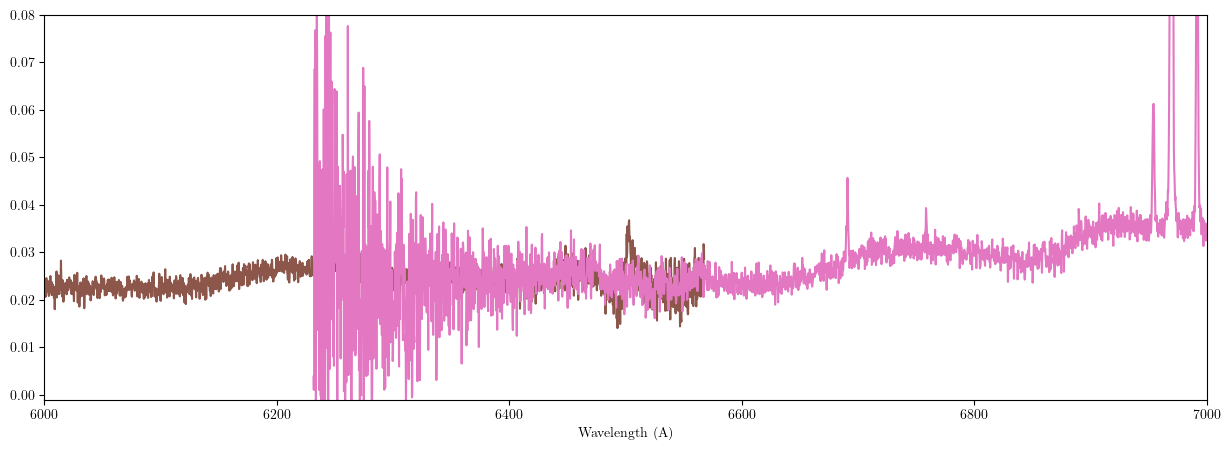

In [128]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1 , fitsfile_1[0].data[0,:]/standard_fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4 , fitsfile_4[0].data[0,:]/standard_fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5 , fitsfile_5[0].data[0,:]/standard_fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6 , fitsfile_6[0].data[0,:]/standard_fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7 , fitsfile_7[0].data[0,:]/standard_fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8 , fitsfile_8[0].data[0,:]/standard_fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9 , fitsfile_9[0].data[0,:]/standard_fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:]/standard_fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-0.001,ymax=0.08)

#ax.set_ylim(ymin=0.001,ymax=0.5)
#ax.semilogy()
plt.savefig('2023dok.png')


fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1 , fitsfile_1[0].data[0,:]/standard_fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4 , fitsfile_4[0].data[0,:]/standard_fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5 , fitsfile_5[0].data[0,:]/standard_fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6 , fitsfile_6[0].data[0,:]/standard_fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7 , fitsfile_7[0].data[0,:]/standard_fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8 , fitsfile_8[0].data[0,:]/standard_fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9 , fitsfile_9[0].data[0,:]/standard_fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:]/standard_fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-0.001,ymax=0.08)
ax.set_xlim(xmin=6000,xmax=7000)

#ax.set_ylim(ymin=0.001,ymax=0.5)
#ax.semilogy()
plt.savefig('2023dok_zoom.png')

In [131]:
aperture=1
fitsfile_1 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022hrs/2022hrs_ex/d2022hrs_esi_echelle_1_ex_order_1.fits')
fitsfile_2 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022hrs/2022hrs_ex/d2022hrs_esi_echelle_1_ex_order_2.fits')
fitsfile_3 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022hrs/2022hrs_ex/d2022hrs_esi_echelle_1_ex_order_3.fits')
fitsfile_4 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022hrs/2022hrs_ex/d2022hrs_esi_echelle_1_ex_order_4.fits')
fitsfile_5 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022hrs/2022hrs_ex/d2022hrs_esi_echelle_1_ex_order_5.fits')
fitsfile_6 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022hrs/2022hrs_ex/d2022hrs_esi_echelle_1_ex_order_6.fits')
fitsfile_7 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022hrs/2022hrs_ex/d2022hrs_esi_echelle_1_ex_order_7.fits')
fitsfile_8 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022hrs/2022hrs_ex/d2022hrs_esi_echelle_1_ex_order_8.fits')
fitsfile_9 =fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022hrs/2022hrs_ex/d2022hrs_esi_echelle_1_ex_order_9.fits')
fitsfile_10=fits.open('/Users/kirstytaggart/UCSC_spectral_pipeline/test_data/esi/2023-03-26/pre_reduced/2022hrs/2022hrs_ex/d2022hrs_esi_echelle_1_ex_order_10.fits')

wave1=getmswave(fitsfile_1[0].header,aperture)
wave2=getmswave(fitsfile_2[0].header,aperture)
wave3=getmswave(fitsfile_3[0].header,aperture)
wave4=getmswave(fitsfile_4[0].header,aperture)
wave5=getmswave(fitsfile_5[0].header,aperture)
wave6=getmswave(fitsfile_6[0].header,aperture)
wave7=getmswave(fitsfile_7[0].header,aperture)
wave8=getmswave(fitsfile_8[0].header,aperture)
wave9=getmswave(fitsfile_9[0].header,aperture)
wave10=getmswave(fitsfile_10[0].header,aperture)

/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/1968317091.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
/var/folders/7m/h0dxnzp11zvfqtfwn_2ttggh0000gn/T/ipykernel_72844/1968317091.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')


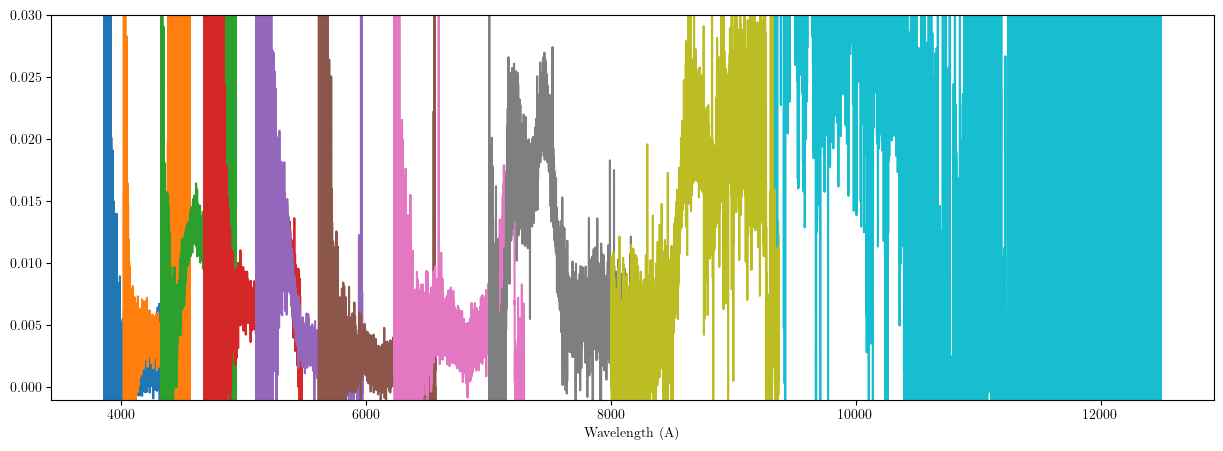

In [133]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(wave1 , fitsfile_1[0].data[0,:]/standard_fitsfile_1[0].data[0,:],label='order 1')
ax.plot(wave2 , fitsfile_2[0].data[0,:]/standard_fitsfile_2[0].data[0,:],label='order 2')
ax.plot(wave3 , fitsfile_3[0].data[0,:]/standard_fitsfile_3[0].data[0,:],label='order 3')
ax.plot(wave4 , fitsfile_4[0].data[0,:]/standard_fitsfile_4[0].data[0,:],label='order 4')
ax.plot(wave5 , fitsfile_5[0].data[0,:]/standard_fitsfile_5[0].data[0,:],label='order 5')
ax.plot(wave6 , fitsfile_6[0].data[0,:]/standard_fitsfile_6[0].data[0,:],label='order 6')
ax.plot(wave7 , fitsfile_7[0].data[0,:]/standard_fitsfile_7[0].data[0,:],label='order 7')
ax.plot(wave8 , fitsfile_8[0].data[0,:]/standard_fitsfile_8[0].data[0,:],label='order 8')
ax.plot(wave9 , fitsfile_9[0].data[0,:]/standard_fitsfile_9[0].data[0,:],label='order 9')
ax.plot(wave10,fitsfile_10[0].data[0,:]/standard_fitsfile_10[0].data[0,:],label='order 10')
ax.set_xlabel('Wavelength (A)')
ax.set_ylim(ymin=-0.001,ymax=0.03)

#ax.set_ylim(ymin=0.001,ymax=0.5)
#ax.semilogy()
plt.savefig('2022hrs.png')


In [147]:
arr=['\taperture\t3\n', '\tbeam\t3\n', '\tcenter\t732.9445 1640.\n', '\tlow\t-6.985 -1639.\n', '\thigh\t6.985 2456.\n', '\tbackground\n', '\t\txmin -61.8334\n', '\t\txmax 34.39882\n', '\t\tfunction chebyshev\n', '\t\torder 2\n', '\t\tsample  -61.8334:-48.87775 23.60443:34.39882\n']


arr[10]



'\t\tsample  -61.8334:-48.87775 23.60443:34.39882\n'

In [149]:
arr[10].split()[1].split(':')[1]

'-48.87775'

In [138]:
arr2=['\taperture\t5\n', '\tbeam\t5\n', '\tcenter\t1157.267 1640.\n', '\tlow\t-7. -1639.\n', '\thigh\t7. 2456.\n', '\tbackground\n', '\t\txmin -25.\n', '\t\txmax 25.\n', '\t\tfunction chebyshev\n', '\t\torder 2\n', '\t\tsample -25:-15,15:25\n']
      
      

In [153]:
arr2[10]

'\t\tsample -25:-15,15:25\n'

In [154]:
arr2[10].split()[1]

'-25:-15,15:25'

In [155]:
arr2[10].split()[1].split(':')[1]

'-15,15'

In [156]:
arr2[10].split()[1].split(':')[1].split(',')[1]

'15'